In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
# Avoid OOM error by setting GPU Memory Consumption to Growth
gpus = tf.config.list_physical_devices('GPU')
if (len(gpus) > 0) :
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print('You do not have a GPU available')

You do not have a GPU available


(3744, 5616, 3)


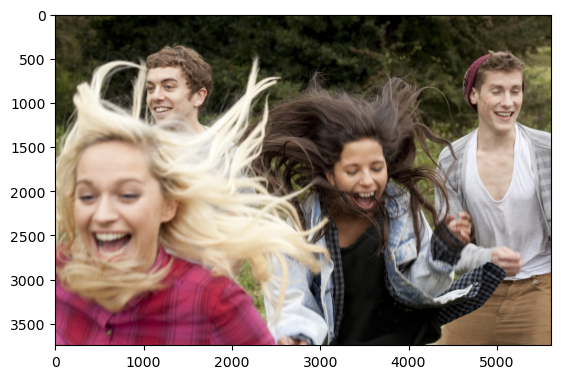

In [3]:
# Viewing an Image
img = cv2.imread(os.path.join('data', 'happy', '154006829.jpg'))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Remove dodgy images
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [5]:
# tf.keras.utils?? -> man command for jupyter
# Builds an image dataset on the fly. You need not build 
# labels, classes anything.
# data[0] will give error as this is not a preloaded dataset.
# This dataset is being created on the fly
data = tf.keras.utils.image_dataset_from_directory('data')

Found 755 files belonging to 2 classes.


In [6]:
# To solve the data[0] problem, we use a numpy iterator
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

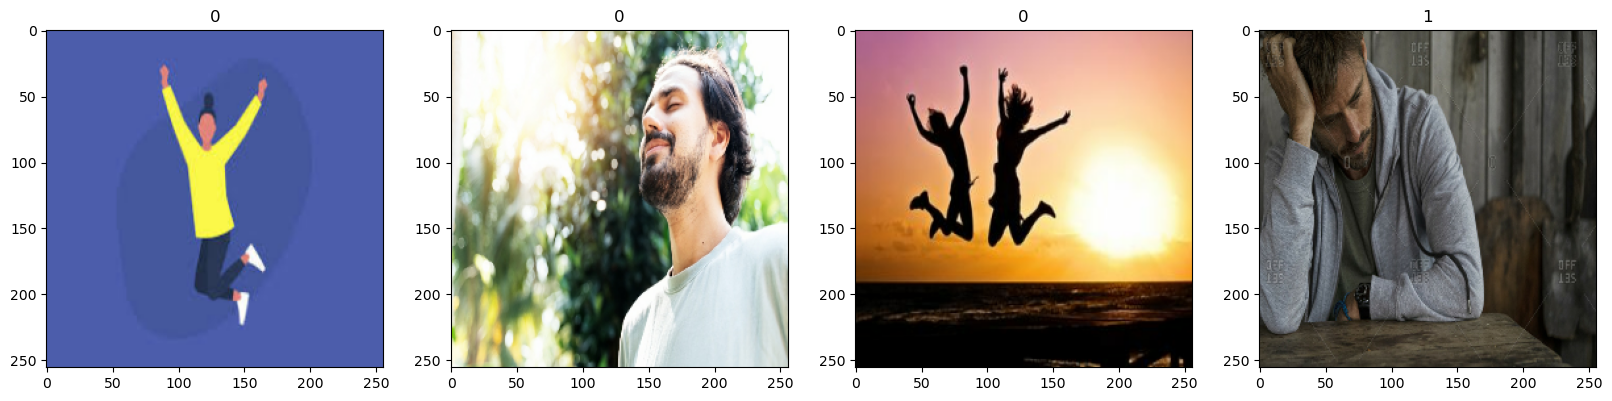

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
# Class 1 = Sad People
# Class 0 = Happy People

In [9]:
# x -> images
# y -> labels
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [11]:
data.as_numpy_iterator().next()[0].max()

1.0

In [12]:
# There are 24 batches and each batch will have 32 images
len(data)

24

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
test_size

2

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
model = Sequential()

In [17]:
# Input Layer (Convolution -> 16 filters -> 3x3 pixels -> stride -> 1 moves 1 pixel at a time)
# Relu -> Any output that was previousy below 0 will be converted to 0 and the +ve will be preserved
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 42s 2s/step - loss: 0.7647 - accuracy: 0.5391 - val_loss: 0.6423 - val_accuracy: 0.5547
Epoch 2/20
16/16 [==============================] - 35s 2s/step - loss: 0.5687 - accuracy: 0.7188 - val_loss: 0.5139 - val_accuracy: 0.7969
Epoch 3/20
16/16 [==============================] - 26s 2s/step - loss: 0.5013 - accuracy: 0.7656 - val_loss: 0.4214 - val_accuracy: 0.8438
Epoch 4/20
16/16 [==============================] - 26s 2s/step - loss: 0.3520 - accuracy: 0.8496 - val_loss: 0.4337 - val_accuracy: 0.8281
Epoch 5/20
16/16 [==============================] - 25s 2s/step - loss: 0.3163 - accuracy: 0.8633 - val_loss: 0.2941 - val_accuracy: 0.8984
Epoch 6/20
16/16 [==============================] - 25s 1s/step - loss: 0.2365 - accuracy: 0.9102 - val_loss: 0.2213 - val_accuracy: 0.8750
Epoch 7/20
16/16 [==============================] - 24s 1s/step - loss: 0.1996 - accuracy: 0.9219 - val_loss: 0.1710 - val_accuracy: 0.9219
Epoch 8/20
16/16 [==

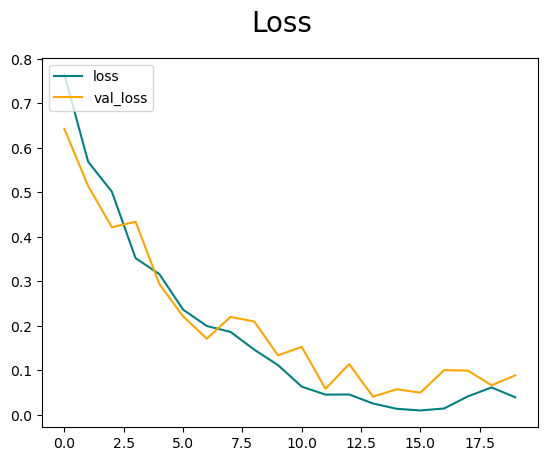

In [22]:
# if loss keeps going down and val_loss rising, it is a case of overfitting
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

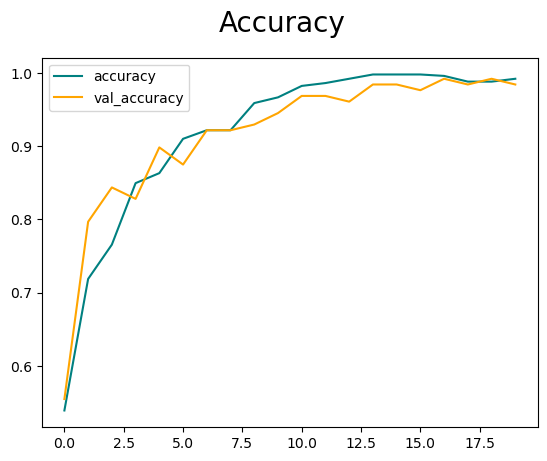

In [23]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 310ms/step


In [26]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.93939394 0.96875


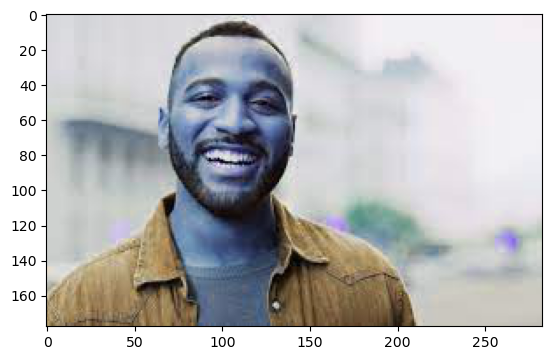

In [27]:
img = cv2.imread('test_img.jpeg')
plt.imshow(img)
plt.show()

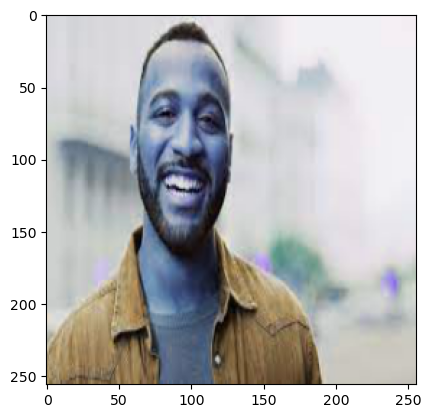

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 245ms/step


In [30]:
yhat

array([[0.00018668]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
